<a href="https://colab.research.google.com/github/SaraOsorno/Examen-DSfundamentals/blob/main/Analizando_las_Elecciones_de_2024_en_India.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analizando las Elecciones de 2024 en India**

**Explicación de la Data**
Este conjunto de datos contiene los resultados completos de las elecciones de Lok Sabha de 2024, obtenidos directamente del sitio web oficial de la Comisión Electoral de la India a través de un script automatizado. Los datos se recopilaron el 5 de junio de 2024, un día después de que se publicaran oficialmente los resultados.

**1. Carga de Librerias:** En este caso importaremos Pandas y matplotlib, como sigue:


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

**2. Creación y carga del Dataset**

Se creara una variable con la ruta del archivo para posteriormente crear el DATASET Y cargarlo.

In [2]:
ruta = '/content/election_results_2024.csv'
df = pd.read_csv(ruta)
df.head()

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared


**3. Analisis del Dataset**

Identificare inicialmente las columnas para tratar de entender mejor esta base de datos y analizar los valores para la limpienza de nuestro df estudiado.

In [3]:
df.columns

Index(['Constituency', 'Const. No.', 'Leading Candidate', 'Leading Party',
       'Trailing Candidate', 'Trailing Party', 'Margin', 'Status'],
      dtype='object')

A continuacion se explica las columnas en cuestion

**Constituency:** Nombre de la circunscripción parlamentaria

**Const. No.:** Número de identificación único asignado a cada circunscripción

**Leading Candidate:** Nombre del candidato que recibio mas votos

**Leading Party**: Partido político del candidato principal

**Trailing Candidate**: Candidato final

**Margin**: Diferencia de votos entre los candidatos principales y los últimos

**Status**: Estado actual del resultado electoral


**4. Verificación de valores inapropiados**

In [4]:
df.describe()

,Const. No.
count,543.000000
mean,18.178637
std,16.427840
min,1.000000
25%,6.000000
50%,14.000000
75%,25.000000
max,80.000000


**Interpretación:** Se presentan valores normales , pero es necesario mencionar que falta una variable que es 'margin' , por lo que es necesario cambiar el tipo de dato porque para los analisis estadisticos es necesario una variable numerica.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Constituency        543 non-null    object
 1   Const. No.          543 non-null    int64 
 2   Leading Candidate   543 non-null    object
 3   Leading Party       543 non-null    object
 4   Trailing Candidate  542 non-null    object
 5   Trailing Party      542 non-null    object
 6   Margin              543 non-null    object
 7   Status              543 non-null    object
dtypes: int64(1), object(7)
memory usage: 34.1+ KB


**Interpretación:** Como vemos de lo dicho anteriormente el 'Margin' deberia ser un entero no un objeto. Asi que procedemos a hacer el cambio

In [6]:
df['Margin'] = pd.to_numeric(df['Margin'], errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Constituency        543 non-null    object 
 1   Const. No.          543 non-null    int64  
 2   Leading Candidate   543 non-null    object 
 3   Leading Party       543 non-null    object 
 4   Trailing Candidate  542 non-null    object 
 5   Trailing Party      542 non-null    object 
 6   Margin              542 non-null    float64
 7   Status              543 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 34.1+ KB


**Interpretacion:** Jesus aca hice lo siguiente #Convertí los valores de 'margin' a número y los valores que no se puedan convertir , si los hay se reemplazaran por  NaN. COmo vemos hay un valor nulo en 'Trailing Candidate', 'Trailing party', 'Margin'

In [7]:
df[df['Margin'].isna()]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
493,Surat,24,MUKESHKUMAR CHANDRAKAANT DALAL,Bharatiya Janata Party,NaN,NaN,NaN,Uncontested


**Interpretacion**:
Como vemos no hay informacion del otro candidato, por lo que es razonable . Tampoco tenemos el dato del margin que es la diferencia de votos y seguidamente, esos NaN es muchisimo menos del 10% de los registros es completamente valido eliminaro

In [8]:
df =df.dropna(subset=['Margin'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 542 entries, 0 to 542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Constituency        542 non-null    object 
 1   Const. No.          542 non-null    int64  
 2   Leading Candidate   542 non-null    object 
 3   Leading Party       542 non-null    object 
 4   Trailing Candidate  542 non-null    object 
 5   Trailing Party      542 non-null    object 
 6   Margin              542 non-null    float64
 7   Status              542 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 38.1+ KB


In [9]:
df.describe()
df = df.astype({'Margin': 'int64'})
df.describe()

,Const. No.,Margin
count,542.000000,5.420000e+02
mean,18.167897,1.623501e+05
std,16.441108,1.472628e+05
min,1.000000,4.800000e+01
25%,6.000000,5.895675e+04
50%,14.000000,1.222660e+05
75%,25.000000,2.229720e+05
max,80.000000,1.175092e+06


AHora vamos a mirar si en nuestro Dataset tenemos valores duplicados que nos puede afectar enormemente en nuestro analisis final. Phyton no te va a hacer todo a ti por ti mismo, si le ingresas cosas incorrectas te va a arrojar analisis incorrectos. Puede que el codigo este bien, pero si esta mal tu interpretacion no sirve para nada.

**5. Valores duplicados**

In [10]:
df[df.duplicated()]

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status


Como vemos no hay valores duplicados , por lo que continuaremos con las visualizaciones

**6. Visualizaciones univariadas**

In [11]:
df.head(10)

,Constituency,Const. No.,Leading Candidate,Leading Party,Trailing Candidate,Trailing Party,Margin,Status
0,AJMER,13,BHAGIRATH CHOUDHARY,Bharatiya Janata Party,RAMCHANDRA CHOUDHARY,Indian National Congress,329991,Result Declared
1,ALWAR,8,BHUPENDER YADAV,Bharatiya Janata Party,LALIT YADAV,Indian National Congress,48282,Result Declared
2,AMBALA,1,VARUN CHAUDHRY,Indian National Congress,BANTO KATARIA,Bharatiya Janata Party,49036,Result Declared
3,ANANTNAG-RAJOURI,3,MIAN ALTAF AHMAD,Jammu & Kashmir National Conference,MEHBOOBA MUFTI,Jammu & Kashmir Peoples Democratic Party,281794,Result Declared
4,ARAKKONAM,7,S JAGATHRATCHAKAN,Dravida Munnetra Kazhagam,L VIJAYAN,All India Anna Dravida Munnetra Kazhagam,306559,Result Declared
5,ARANI,12,THARANIVENTHAN M S,Dravida Munnetra Kazhagam,"GAJENDRAN, G.V.",All India Anna Dravida Munnetra Kazhagam,208766,Result Declared
6,Adilabad,1,GODAM NAGESH,Bharatiya Janata Party,ATHRAM SUGUNA,Indian National Congress,90652,Result Declared
7,Agra,18,PROF S P SINGH BAGHEL,Bharatiya Janata Party,SURESH CHAND KARDAM,Samajwadi Party,271294,Result Declared
8,Ahmedabad East,7,HASMUKHBHAI PATEL (H.S.PATEL),Bharatiya Janata Party,HIMMATSINH PRAHLADSINH PATEL,Indian National Congress,461755,Result Declared
9,Ahmedabad West,8,DINESHBHAI MAKWANA (ADVOCATE),Bharatiya Janata Party,BHARAT YOGENDRA MAKWANA,Indian National Congress,286437,Result Declared


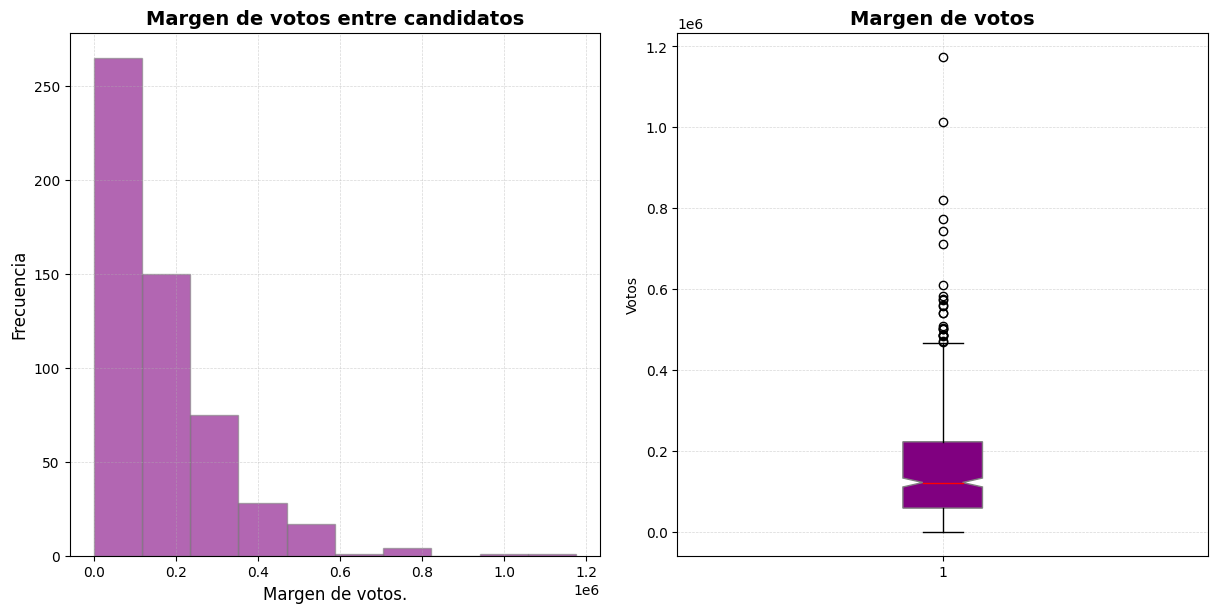

In [16]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

# BoxPlot distribución del amrgen
ax[1].boxplot(df['Margin'], notch=True,
              patch_artist=True,
              boxprops=dict(facecolor='purple', color='gray'),
              medianprops=dict(color='red'),
              whiskerprops=dict(color='black'),
              capprops=dict(color='black'))
ax[1].set_title("Margen de votos",
                fontsize = 14,
                fontweight = 'bold')
ax[1].set_ylabel("Votos")
ax[1].grid(True,
            linestyle='--',
            linewidth=0.5,
            alpha=0.5)

plt.tight_layout();


#  Histograma distribución del margen
ax[0].hist(df['Margin'],
            bins=10,
            alpha=0.6,
            color='purple',
            edgecolor='grey',
            linewidth=1)

ax[0].set_title(f'Margen de votos entre candidatos',
                 fontsize = 14,
                 fontweight = 'bold')

ax[0].set_xlabel('Margen de votos.', fontsize=12)
ax[0].set_ylabel('Frecuencia', fontsize=12)

ax[0].grid(True,
            linestyle='--',
            linewidth=0.5,
            alpha=0.5)



Aca hicimos un histograma y un boxplot de la variable 'Margin'. La mayor diferencia entre votos fue de 250 mil.

**7. Visualizaciones multivariadas**

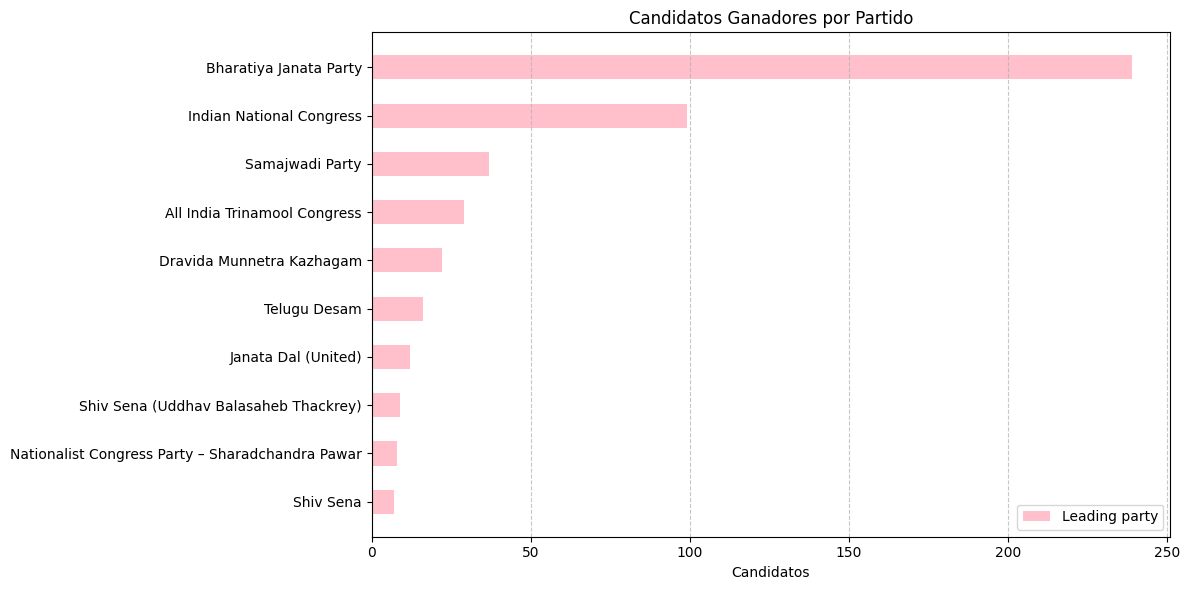

In [18]:
# Agrupamos por partido ganador
grouped_by_leading_party = df.groupby('Leading Party')

# Aca tenemos ganadores por leading party
ganadores_por_leading_party = grouped_by_leading_party['Leading Party'].count().sort_values(ascending=False)


# Agrupamos por candidato perdedor
grouped_by_trailing_candidate = df.groupby('Trailing Party')

# Aca tenemos perdedores por trailing party
perdedores_por_leading_party = grouped_by_trailing_candidate['Trailing Party'].count().sort_values(ascending=False)
perdedores_por_leading_party.iloc[0:10]

# Creo el gráfico
fig1, ax1 = plt.subplots( figsize=(12,6))
height = 0.5

# Serie leading party
ax1.barh(ganadores_por_leading_party.iloc[0:10].index,
         ganadores_por_leading_party.iloc[0:10],
         color='pink',
         label='Leading party',
         height=height)


# Ejes y titulos
ax1.set_xlabel('Candidatos')
ax1.set_title('Candidatos Ganadores por Partido')
ax1.legend()
ax1.grid(True, axis='x', linestyle='--', alpha=0.7)
ax1.invert_yaxis() #Por estetica use esto para ser mas aagardable visualmente

plt.tight_layout();

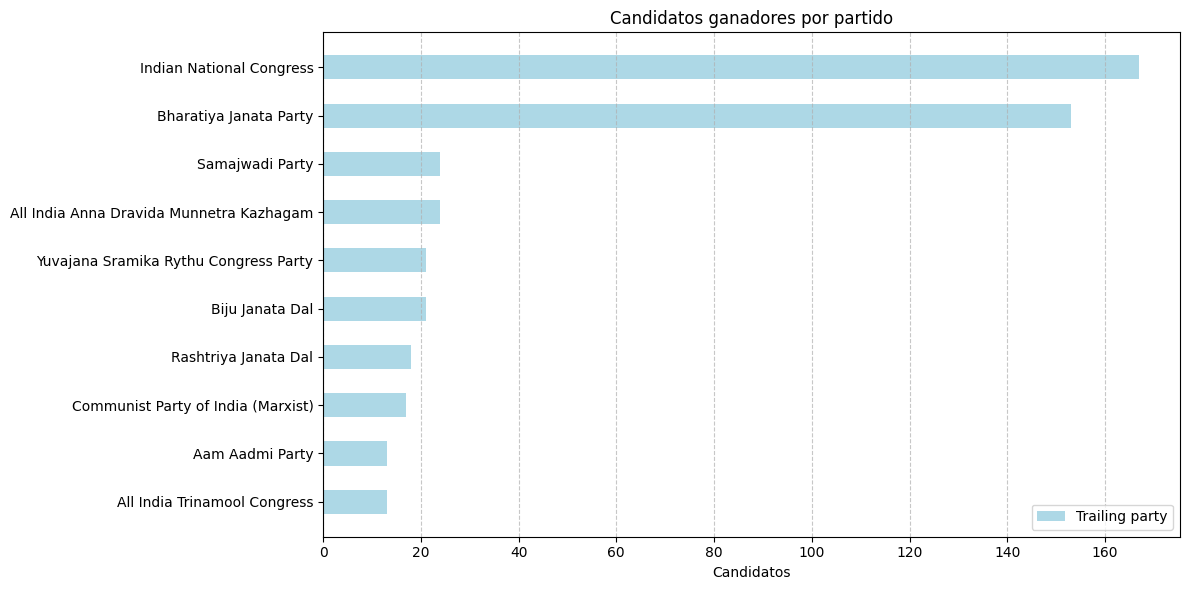

In [23]:
# Creo el gráfico
fig1, ax1 = plt.subplots( figsize=(12,6))
height = 0.5

# Serie trailing party
ax1.barh(perdedores_por_leading_party.iloc[0:10].index,
         perdedores_por_leading_party.iloc[0:10],
         color='lightblue',
         label='Trailing party',
         height=height)

# Nombres titulos y Ejes
ax1.set_xlabel('Candidatos')
ax1.set_title('Candidatos ganadores por partido')
ax1.legend()
ax1.grid(True, axis='x', linestyle='--', alpha=0.7)
ax1.invert_yaxis()  # Para que los valores mayores aparezcan arriba


plt.tight_layout();

**Interpretacion: **

Como vemos los candidatos por partido son mayores en el  Indian National Congress y Bharatiya Janata Party

**8. Analisis estadistico**

Estadísticas descriptivas de la variable 'Margin':

**Recuento (count):** 542


**El número total de observaciones** o distritos electorales en los que se calculó la diferencia de votos.

**Media (mean): **162,350.1
La diferencia promedio de votos entre los principales y los últimos candidatos es de 162,350.1 votos. Esto sugiere una diferencia considerable entre los candidatos en la mayoría de los distritos.

**Desviación estándar (std):** 147,262.8
La alta desviación estándar indica que hay una variabilidad significativa en las diferencias de votos entre los diferentes distritos.

**Valor mínimo (min):** 48
La diferencia mínima de votos en un distrito es de 48 votos, lo que indica una contienda extremadamente reñida en al menos un distrito.

**Percentil 25 (25%):** 58,956.75
El 25% de los distritos tuvo una diferencia de votos menor a 58,956.75, lo que implica que en un cuarto de los distritos, la contienda fue relativamente cerrada.

**Mediana (50%)**: 122,266
La mediana es de 122,266 votos, lo que indica que la mitad de los distritos tuvo una diferencia de votos por encima de este valor y la otra mitad por debajo.

**Percentil 75 (75%):** 222,972
El 25% superior de los distritos tuvo una diferencia de votos mayor a 222,972, lo que sugiere que en una cuarta parte de los distritos, la victoria fue amplia.

**Valor máximo (max):** 1,175,092
La mayor diferencia de votos registrada es de 1,175,092, lo que señala una victoria aplastante en al menos un distrito.

**Observaciones adicionales:**
- La amplia diferencia entre el valor mínimo y máximo, junto con una desviación estándar alta, indica que hay una gran variabilidad en los márgenes de victoria entre los diferentes distritos.
- La mediana es menor que la media, lo que sugiere que hay algunos distritos con diferencias extremadamente grandes que están sesgando la media hacia arriba.
Este análisis sugiere que, aunque hay muchos distritos con márgenes estrechos, también hay varios con márgenes muy amplios, lo que podría reflejar diferencias significativas en el apoyo a los candidatos en diferentes regiones del país.